### E-tivity 3

Your Name: Martina Ryan

Your Student ID Number: 20200692

# Lab 3: Clustering and Manifold Learning

### Task 2
Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.
Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Load the dataset

In [115]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [117]:
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

In [118]:
df.astype('object').describe().transpose()

count  unique       top   freq
Dependents               614.0     4.0  0.000000  360.0
ApplicantIncome          614.0   505.0  0.593398    9.0
LoanAmount               614.0   204.0  1.058140   22.0
Loan_Amount_Term         614.0    10.0  0.750000  526.0
Credit_History           614.0     2.0  1.000000  525.0
Gender_Male              614.0     2.0  1.000000  489.0
Gender_nan               614.0     2.0  0.000000  601.0
Married_Yes              614.0     2.0  1.000000  398.0
Married_nan              614.0     2.0  0.000000  611.0
Self_Employed_Yes        614.0     2.0  0.000000  532.0
Self_Employed_nan        614.0     2.0  0.000000  582.0
Education_Not Graduate   614.0     2.0  0.000000  480.0
Property_Area_Semiurban  614.0     2.0  0.000000  381.0
Property_Area_Urban      614.0     2.0  0.000000  412.0
Loan_Status_Y            614.0     2.0  1.000000  422.0
TotalIncome              614.0   554.0  0.860305    5.0

In [119]:
#let's make a copy of it.
df_original = df

### B. Rescale the Data
Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.

In [120]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [121]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

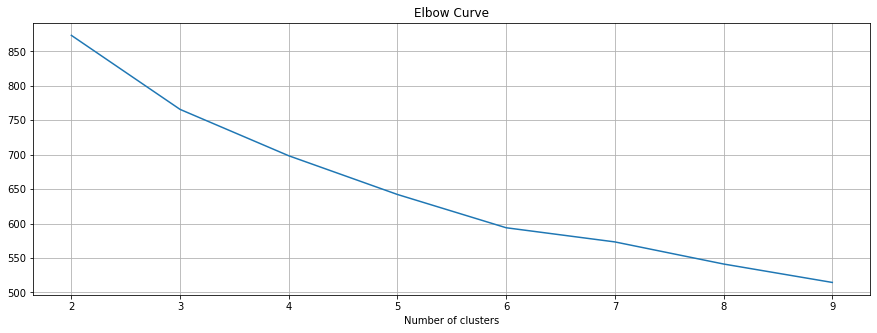

In [156]:
wcss = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,n_init=10, max_iter=300).fit(data)
    df["clusters"] = kmeans.labels_
    #print(df["clusters"])
    wcss[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure(figsize=(15, 5))
plt.grid(True)
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel("Number of clusters")
plt.title('Elbow Curve')
plt.show()

Number of clusters $k$.

#### Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

### Silhouette Coefficient Method

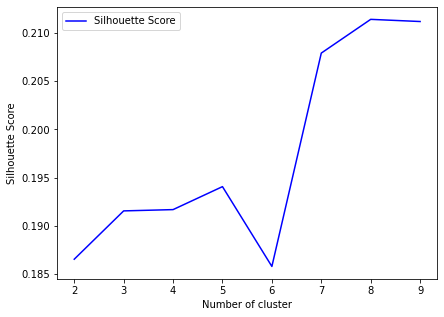

In [155]:
range_n_clusters = range(2, 10)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(data)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(data, cluster_labels, metric='euclidean')
   ss.append(silhouette_avg)
   # print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(15,5))
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Rest to be continued. 

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [ ]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [ ]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

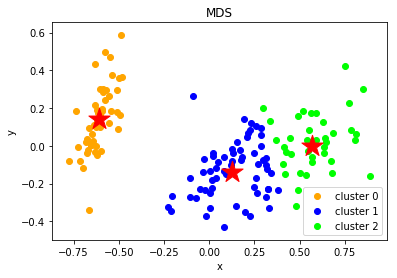

In [9]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [10]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

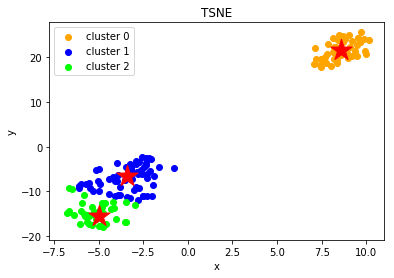

In [11]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [12]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [13]:
df.head()

sepallength  sepalwidth  petallength  petalwidth  cluster
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0

In [14]:
df.tail()

sepallength  sepalwidth  petallength  petalwidth  cluster
145          6.7         3.0          5.2         2.3        2
146          6.3         2.5          5.0         1.9        1
147          6.5         3.0          5.2         2.0        2
148          6.2         3.4          5.4         2.3        2
149          5.9         3.0          5.1         1.8        1

#### Compute the mean value of each attribute for each cluster

In [15]:
df.groupby('cluster').mean()

sepallength  sepalwidth  petallength  petalwidth
cluster                                                  
0           5.006000    3.418000     1.464000    0.244000
1           5.888525    2.737705     4.396721    1.418033
2           6.846154    3.082051     5.702564    2.079487

#### Conclusion

By looking at the table above we can argue that:
* Cluster 2 are large iris flowers with the largest petals out of the three types.
* Cluster 0 are iris flowers with small petals (notably smaller than the other two types) but with wide sepals, the widest sepals of all three types. This is also the cluster that is clearly differentiated from the other two clusters in the scatter plots.
* Cluster 1 flowers are slightly smaller than cluster 2 flowers with a most notable difference in the width of the petals.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._